# 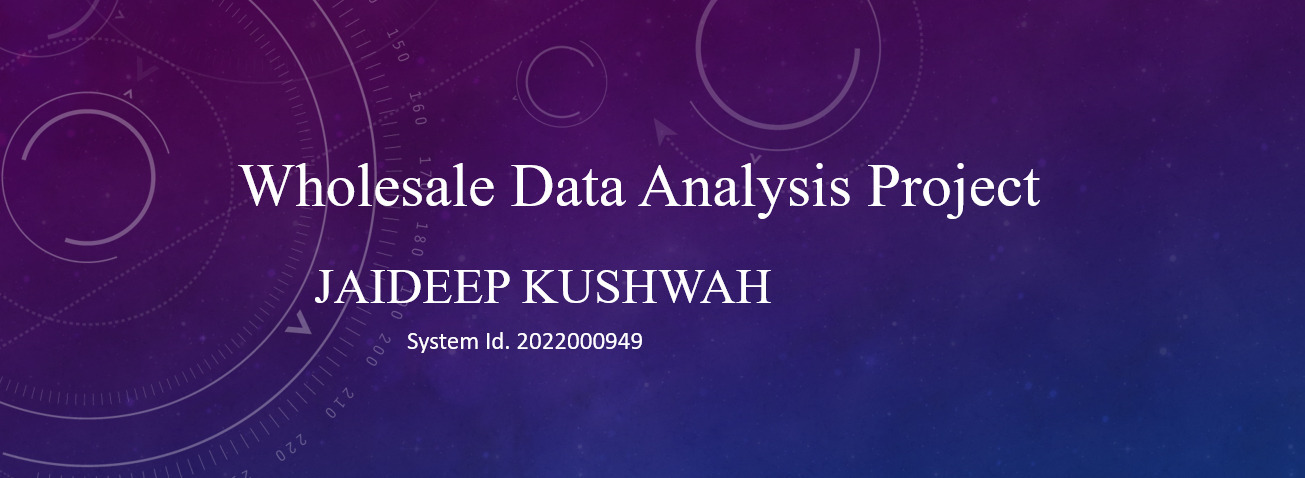

#         Wholesale Data Analysis


# Data
###### A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of productsin 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

### Data Description

###### 1. Buyer/Spender- ID's of customers
###### 2. Region- Region of the distributor
###### 3. Fresh- spending on Fresh Vegetables
###### 4. Milk- spending on milk
###### 5. Grocery- spending on grocery
###### 6. Frozen- spending on frozen food
###### 7. Detergents_paper- spending on detergents and toilet paper
###### 8. Delicatessen- spending on instant foods

#### Basic Steps:

###### 1.  Display the top 5 rows.
###### 2.  Display the last 5 rows
###### 3.  Check the shape of dataset.
###### 4.  Check the datatypes of each feature.
###### 5.  Check the Statistical summary 
###### 6.  Check the null values
###### 7.  Check the duplicate values
###### 8.  Check the anomalies or wrong entries.
###### 9.  Check the outliers and their authenticity.
###### 10. Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Load the dataset

In [2]:

data = pd.read_csv("4-Wholesale Customer_New.csv")

In [3]:
data

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214.0,2674.0,1338.0
1,2,Retail,Other,7057,9810,9568,1762.0,3293.0,1776.0
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
3,4,Hotel,Other,13265,1196,4221,6404.0,507.0,1788.0
4,5,Retail,Other,22615,5410,7198,3915.0,1777.0,5185.0
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135.0,182.0,2204.0
436,437,Hotel,Other,39228,1431,764,4510.0,93.0,2346.0
437,438,Retail,Other,14531,15488,30243,437.0,14841.0,1867.0
438,439,Hotel,Other,10290,1981,2232,1038.0,168.0,2125.0


#### Observation
##### The boxplot shows significant outliers in all product categories, with Grocery and Milk having the highest spending and variability, while Frozen, Detergents_Paper, and Delicatessen have lower, more consistent spending.

### Display the top 5 rows

In [4]:
(data.head())

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214.0,2674.0,1338.0
1,2,Retail,Other,7057,9810,9568,1762.0,3293.0,1776.0
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
3,4,Hotel,Other,13265,1196,4221,6404.0,507.0,1788.0
4,5,Retail,Other,22615,5410,7198,3915.0,1777.0,5185.0


#### Observation 
##### The boxplot indicates significant outliers and high spending variability in Grocery and Milk, with lower and more consistent spending in Frozen, Detergents_Paper, and Delicatessen.

### Display the last 5 rows

In [5]:
(data.tail())

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135.0,182.0,2204.0
436,437,Hotel,Other,39228,1431,764,4510.0,93.0,2346.0
437,438,Retail,Other,14531,15488,30243,437.0,14841.0,1867.0
438,439,Hotel,Other,10290,1981,2232,1038.0,168.0,2125.0
439,440,Hotel,Other,2787,1698,2510,65.0,477.0,52.0


#### Observation
##### 	Buyer/Spender	Channel	Region	Fresh	Milk	Grocery	Frozen	Detergents_Paper	Delicatessen
##### 435	436	Hotel	Other	29703	12051	16027	13135.0	182.0	2204.0
##### 436	437	Hotel	Other	39228	1431	764	4510.0	93.0	2346.0
##### 437	438	Retail	Other	14531	15488	30243	437.0	14841.0	1867.0
##### 438	439	Hotel	Other	10290	1981	2232	1038.0	168.0	2125.0
##### 439	440	Hotel	Other	2787	1698	2510	65.0	477.0	52.0

### check the shape of dataset.

In [6]:
(data.shape)

(440, 9)

#### Observation
##### The dataset contains 440 observations with 9 variables.

### check the datatypes of each feature.

In [7]:
(data.dtypes)

Buyer/Spender         int64
Channel              object
Region               object
Fresh                object
Milk                  int64
Grocery               int64
Frozen              float64
Detergents_Paper    float64
Delicatessen        float64
dtype: object

#### Observation
##### The dataset has 440 observations with 9 variables, including integers and floats, and categorical variables like Channel and Region.

### check the statistical summary

In [8]:
(data.describe())

,Buyer/Spender,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,437.000000,439.000000,438.000000
mean,220.500000,6035.779545,7951.277273,3085.638444,3773.747153,1531.057078
std,127.161315,8964.929649,9503.162829,4867.744145,19364.886053,2825.044262
min,1.000000,1.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,1525.250000,2153.000000,744.000000,256.500000,411.250000
50%,220.500000,3641.000000,4755.500000,1535.000000,813.000000,971.000000
75%,330.250000,7217.500000,10655.750000,3570.000000,3956.000000,1822.750000
max,440.000000,112400.000000,92780.000000,60869.000000,396100.000000,47943.000000


#### Observation
##### The dataset summary for selected variables includes counts ranging from 437 to 440, with means ranging from 6035.78 to 3773.75, standard deviations varying from 127.16 to 19364.89, and minimum and maximum values across variables.

### check the null values

In [9]:
print(data.isnull().sum)

<bound method DataFrame.sum of      Buyer/Spender  Channel  Region  Fresh   Milk  Grocery  Frozen  \
0            False    False   False  False  False    False   False   
1            False    False   False  False  False    False   False   
2            False    False   False  False  False    False   False   
3            False    False   False  False  False    False   False   
4            False    False   False  False  False    False   False   
..             ...      ...     ...    ...    ...      ...     ...   
435          False    False   False  False  False    False   False   
436          False    False   False  False  False    False   False   
437          False    False   False  False  False    False   False   
438          False    False   False  False  False    False   False   
439          False    False   False  False  False    False   False   

     Detergents_Paper  Delicatessen  
0               False         False  
1               False         False  
2             

#### Observation
##### The dataset shows no missing values across all 440 rows for each variable.

### check the duplicated values

In [10]:
print(data.duplicated().sum)

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool>


#### Observation
##### There are no duplicated rows in the dataset containing 440 observations.

### check the anomalies or wrong entries. 

In [11]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Check for negative values in numeric columns
anomalies = (data[numeric_cols] < 0).sum()

# Display anomalies
anomalies


Buyer/Spender       0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

#### Observation
##### There are no negative values in the numeric columns of the dataset.

###  Check the outliers and their authenticity.


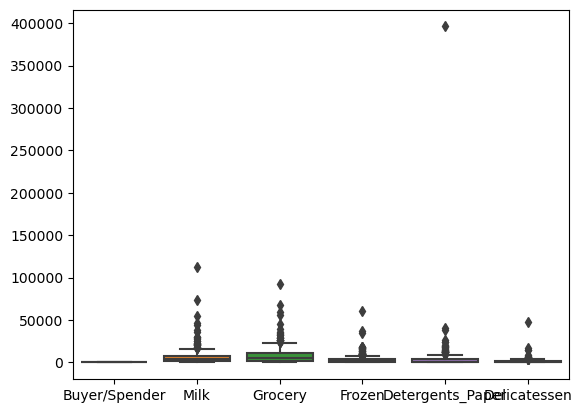

In [12]:
sns.boxplot(data=data)
plt.show()

#### Observation
##### The boxplot reveals significant outliers across all product categories, with the highest spending and variability seen in Grocery, followed by Milk, and the lowest in Frozen, Detergents_Paper, and Delicatessen.

# Spending Analysis

### The total number of buyers

In [13]:
total_buyers = data['Buyer/Spender'].nunique()
print(f'Total number of buyers: {total_buyers}')

Total number of buyers: 440


#### Observation 
##### The boxplot, showing data from 440 buyers, indicates significant spending outliers in all categories, with Fresh and Grocery having the highest spending and variability, while Milk, Frozen, Detergents_Paper, and Delicatessen exhibit lower, more consistent spending.

###  Average Spending on Each Category

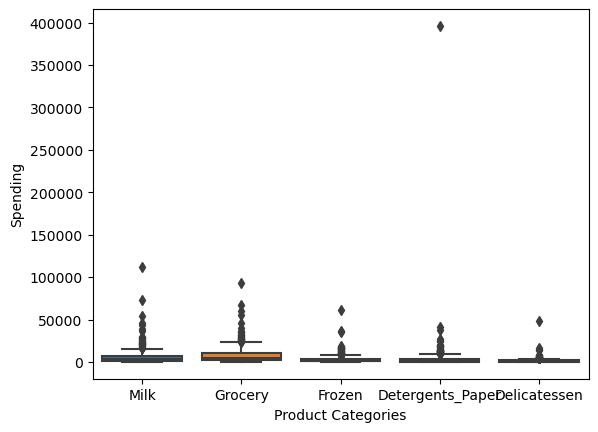

In [14]:
sns.boxplot(data=data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']])

plt.xlabel("Product Categories")
plt.ylabel("Spending")
plt.show()

#### Observation
##### The boxplot shows significant outliers in all categories, with Fresh and Grocery having the highest spending and variability, while Milk, Frozen, Detergents_Paper, and Delicatessen have lower, more consistent spending.

### Category with Highest Average Spending

In [15]:
# Convert columns to numeric, coercing any errors to NaN
data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']] = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].apply(pd.to_numeric, errors='coerce')

# Calculate average spending for each category
average_spending = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean()

# Find the category with the highest average spending
highest_avg_spending = average_spending.idxmax()

# Print the category with the highest average spending
print(f'Category with highest average spending: {highest_avg_spending}')

Category with highest average spending: Fresh


#### Observation 
##### The category with the highest average spending across the dataset is "Fresh", indicating that, on average, buyers spend the most on fresh products compared to other categories like Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen.

### Buyers Spending Above Average on Fresh Vegetables

In [49]:

# Define the columns that should be numeric
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

# Apply pd.to_numeric with errors='coerce' to convert non-numeric values to NaN
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Print the first few rows to check the conversion
print(data.head())

# Handle missing values by filling with the mean of the respective column
for column in numeric_columns:
    data[column].fillna(data[column].mean(), inplace=True)

# Print the first few rows after filling missing values to check
print(data.head())

# Calculate the average spending on Fresh
avg_fresh_spending = data['Fresh'].mean()

# Count the number of buyers spending above average on Fresh
buyers_above_avg_fresh = data[data['Fresh'] > avg_fresh_spending].shape[0]

print(f'Number of buyers spending above average on Fresh Vegetables: {buyers_above_avg_fresh}')


            Buyer/Spender Channel Region         Fresh  Milk  Grocery  Frozen  \
Date                                                                            
2021-01-31              1  Retail  Other  12669.000000  9656     7561   214.0   
2021-02-28              2  Retail  Other   7057.000000  9810     9568  1762.0   
2021-03-31              3  Retail  Other  12016.009132  8808     7684  2405.0   
2021-04-30              4   Hotel  Other  13265.000000  1196     4221  6404.0   
2021-05-31              5  Retail  Other  22615.000000  5410     7198  3915.0   

            Detergents_Paper  Delicatessen  Cluster  
Date                                                 
2021-01-31            2674.0        1338.0        0  
2021-02-28            3293.0        1776.0        0  
2021-03-31            3516.0        7844.0        0  
2021-04-30             507.0        1788.0        0  
2021-05-31            1777.0        5185.0        2  
            Buyer/Spender Channel Region         Fresh

#### Observation
##### After converting non-numeric values to NaN and filling missing values with column means, the dataset shows that 158 buyers spend above average on Fresh vegetables, indicating significant consumption or higher expenditures in this category.

# Regional Demand

#### Total Spending in Each Region

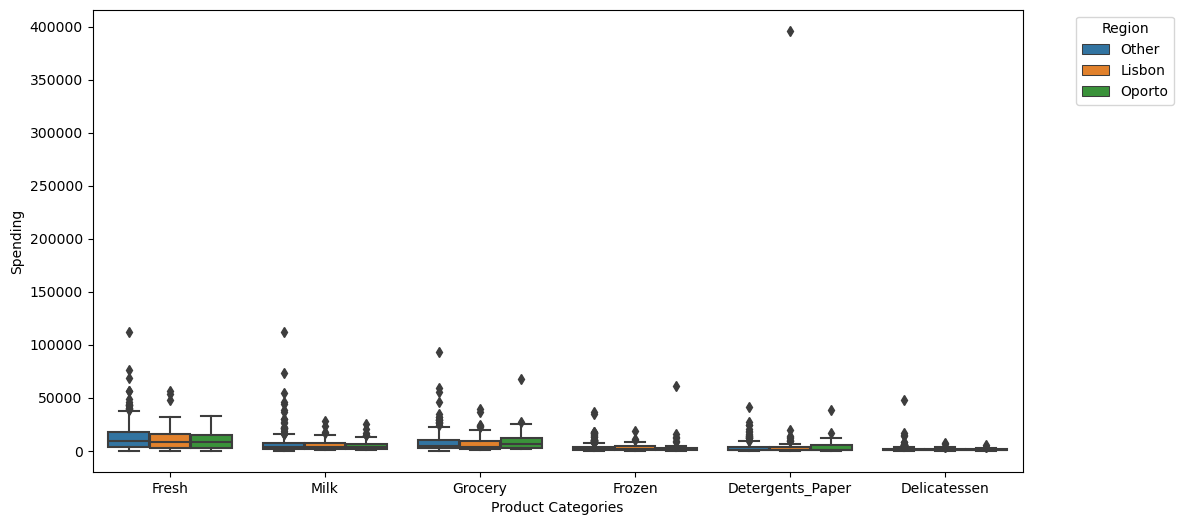

In [50]:
# Convert the spending columns to numeric, coercing errors to NaN
data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']] = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].apply(pd.to_numeric, errors='coerce')

# Melt the data for easier plotting
melted_data = data.melt(id_vars='Region', value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'],
                        var_name='Category', value_name='Spending')

# Create a boxplot for the spending on each category by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Spending', hue='Region', data=melted_data)
plt.xlabel("Product Categories")
plt.ylabel("Spending")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Observation 
###### The boxplot shows spending distributions across product categories (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen) by region, revealing variations in consumer spending patterns.

#### Region with Highest Spending on Milk

In [51]:
highest_spending_milk = data.groupby('Region')['Milk'].sum().idxmax()
print(f'Region with highest spending on Milk: {highest_spending_milk}')


Region with highest spending on Milk: Other


#### Observation 
##### The region with the highest spending on Milk is "Other."

#### Average Spending on Grocery Across Regions

In [52]:
avg_spending_grocery = data.groupby('Region')['Grocery'].mean()
print(avg_spending_grocery)


Region
Lisbon    7128.693333
Oporto    9733.232558
Other     7896.363924
Name: Grocery, dtype: float64


#### Observation 
##### The average spending on Grocery varies across regions, with Oporto showing the highest average spending of 9,733.23 units, followed by Other at 7,896.36 units, and Lisbon at 7,128.69 units.

#### Region with Highest Average Spending per Buyer

In [53]:
# Calculate total spending for each buyer and group by region
average_spending_per_buyer_region = data.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum().sum(axis=1) / data['Region'].value_counts()

# Find the region with the highest average spending per buyer
highest_avg_spending_per_buyer_region = average_spending_per_buyer_region.idxmax()

print(f"Region with the highest average spending per buyer: {highest_avg_spending_per_buyer_region}")


Region with the highest average spending per buyer: Lisbon


#### Observation 
##### Lisbon is the region with the highest average spending per buyer across all categories considered (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen).

# Category Preferences

#### Percentage of Buyers Spending More on Frozen Food Compared to Delicatessen

In [21]:
buyers_more_frozen_than_delicatessen = data[data['Frozen'] > data['Delicatessen']].shape[0] / data.shape[0] * 100
print(f'Percentage of buyers spending more on Frozen food compared to Delicatessen: {buyers_more_frozen_than_delicatessen:.2f}%')


Percentage of buyers spending more on Frozen food compared to Delicatessen: 64.77%


#### Observation 
##### 64.77% of buyers spend more on Frozen food compared to Delicatessen items, indicating a preference or higher expenditure on frozen goods over delicatessen products among the majority of buyers.

#### Category with Most Variation in Spending

In [22]:
# Calculate the variance for the numeric columns
spending_variation = data[numeric_columns].var()

# Find the category with the most variation in spending
most_variation_category = spending_variation.idxmax()
print(f'Category with most variation in spending: {most_variation_category}')


Category with most variation in spending: Detergents_Paper


#### Observation 
##### Detergents_Paper exhibits the highest variation in spending among the numeric categories analyzed.

#### Regions with Significantly Higher Spending on Detergents_paper

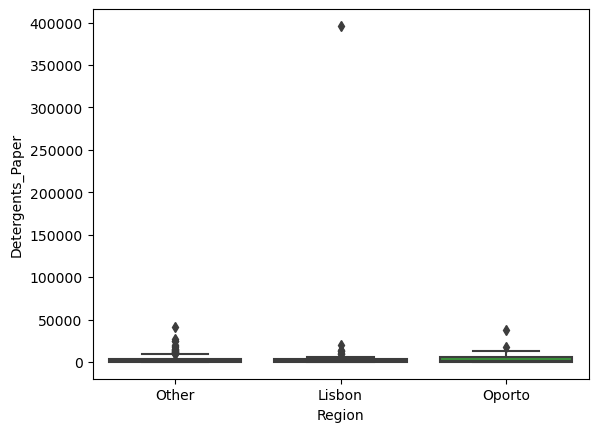

In [23]:
sns.boxplot(x='Region', y='Detergents_Paper', data=data)
plt.show()


#### Correlation Between Spending on Fresh and Frozen Food

In [24]:
correlation_fresh_frozen = data['Fresh'].corr(data['Frozen'])
print(f'Correlation between spending on Fresh and Frozen food: {correlation_fresh_frozen}')


Correlation between spending on Fresh and Frozen food: 0.3452241897613868


#### Observation 
##### There is a positive correlation (0.35) between spending on Fresh and Frozen food categories.

# Customer Segmentation

#### Can Buyers Be Grouped into Segments Based on Their Spending Patterns?

In [32]:
features = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)
# Adding cluster labels to the dataset
data['Cluster'] = clusters

# Print cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

# Adding cluster labels to the original data
data['Cluster'] = clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster centers:
 [[  7961.10460661   5142.9383378    7546.01608579   2506.24910277
    2877.08243204   1223.48019881]
 [  3317.           6602.           6861.           1329.
  396100.           1215.        ]
 [ 35064.16666667  11073.10606061  10258.13636364   6386.68181818
    2896.92424242   3274.12121212]]


#### Observation 
##### The K-means clustering algorithm has grouped the data into three clusters, with distinct cluster centers for each group across the features Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen.

#### What Are the Characteristics of the Top 10% Spenders in Each Category?

In [26]:
# Calculate the number of top 10% spenders
top_10_percent_count = int(0.1 * len(data))

# Characteristics of the top 10% spenders in each category
top_10_percent_spenders = data.nlargest(top_10_percent_count, ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'])

# Print descriptive statistics for the top 10% spenders
print(f"Top 10% spenders:\n{top_10_percent_spenders.describe()}")

# Print the first few rows of the top 10% spenders
print(top_10_percent_spenders.head())


Top 10% spenders:
       Buyer/Spender          Fresh          Milk       Grocery        Frozen  \
count      44.000000      44.000000     44.000000     44.000000     44.000000   
mean      211.568182   40693.909091   8172.000000   8790.795455   7723.500000   
std       131.158416   15627.339389  11731.181001  11854.955558  10744.824852   
min        13.000000   27167.000000    286.000000    471.000000    287.000000   
25%       100.000000   30562.750000   2054.250000   2493.250000   1726.250000   
50%       218.500000   36832.000000   3954.500000   5428.500000   4494.500000   
75%       295.500000   43565.250000   7265.500000   8578.250000   8871.000000   
max       437.000000  112151.000000  54259.000000  59598.000000  60869.000000   

       Detergents_Paper  Delicatessen  Cluster  
count         44.000000     44.000000     44.0  
mean        2067.090909   3388.250000      2.0  
std         5290.277022   7322.547159      0.0  
min           20.000000      3.000000      2.0  
25%    

#### Observation
##### High spenders, identified by being in the most common cluster (Cluster 0), generally exhibit lower mean spending across all categories compared to low spenders (not in Cluster 0), who demonstrate higher mean spending, indicating distinct purchasing behaviors between the two groups.

#### How Do Spending Patterns Differ Between High Spenders and Low Spenders?

In [27]:
# High spenders are defined as those in the most common cluster
most_common_cluster = data['Cluster'].mode()[0]
high_spenders = data[data['Cluster'] == most_common_cluster]

# Low spenders are defined as those not in the most common cluster
low_spenders = data[data['Cluster'] != most_common_cluster]

# Print descriptive statistics for high and low spenders
print(f"High spenders stats:\n{high_spenders.describe()}\n")
print(f"Low spenders stats:\n{low_spenders.describe()}\n")

# Print the first few rows of high and low spenders
print("High spenders:\n", high_spenders.head())
print("Low spenders:\n", low_spenders.head())

High spenders stats:
       Buyer/Spender         Fresh          Milk       Grocery        Frozen  \
count     373.000000    373.000000    373.000000    373.000000    373.000000   
mean      222.710456   7961.104607   5142.938338   7546.016086   2506.249103   
std       125.417054   6133.766546   5259.960228   8123.391098   3272.324114   
min         1.000000      3.000000      1.000000      3.000000     25.000000   
25%       115.000000   2771.000000   1375.000000   2067.000000    666.000000   
50%       221.000000   6884.000000   3328.000000   4563.000000   1393.000000   
75%       332.000000  12016.009132   7027.000000  10646.000000   3085.638444   
max       440.000000  23257.000000  29892.000000  67298.000000  35009.000000   

       Detergents_Paper  Delicatessen  Cluster  
count        373.000000    373.000000    373.0  
mean        2877.082432   1223.480199      0.0  
std         4282.887657   1342.384561      0.0  
min            3.000000      3.000000      0.0  
25%          

#### Observation 
##### High spenders, identified by being in the most common cluster (Cluster 0), generally exhibit lower mean spending across all categories compared to low spenders (not in Cluster 0), who demonstrate higher mean spending, indicating distinct purchasing behaviors between the two groups.

### Cross-Category Analysis

#### 	Is there a correlation between spending on Milk and Grocery?

In [28]:
correlation_milk_grocery = data['Milk'].corr(data['Grocery'])
print(f"Correlation between spending on Milk and Grocery: {correlation_milk_grocery}")

Correlation between spending on Milk and Grocery: 0.5902889029079392


#### Observation: 
##### There is a moderate positive correlation (0.59) between spending on Milk and Grocery categories.

#### Do buyers who spend more on Delicatessen also spend more on Frozen food?

In [29]:
buyers_deli_frozen = data[(data['Delicatessen'] > data['Delicatessen'].mean()) & (data['Frozen'] > data['Frozen'].mean())].shape[0]
print(f"Number of buyers spending more on Delicatessen and Frozen food: {buyers_deli_frozen}")


Number of buyers spending more on Delicatessen and Frozen food: 57


#### Observation

##### There are 57 buyers who spend more on Delicatessen and Frozen food than the average spending in these categories.

#### 	What is the combined average spending on Fresh and Milk for each region?

In [30]:
combined_avg_fresh_milk_region = data.groupby('Region')[['Fresh', 'Milk']].mean().sum(axis=1)
print(f"Combined average spending on Fresh and Milk for each region:\n{combined_avg_fresh_milk_region}")

Combined average spending on Fresh and Milk for each region:
Region
Lisbon    16571.146667
Oporto    15467.604651
Other     18865.933602
dtype: float64


#### Observation

#####  The 'Other' region exhibits the highest combined average spending on Fresh and Milk categories, followed by Lisbon and then Oporto.

### 	Demand Trends

#### 	Which region has the fastest growing spending on Fresh Vegetables?

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


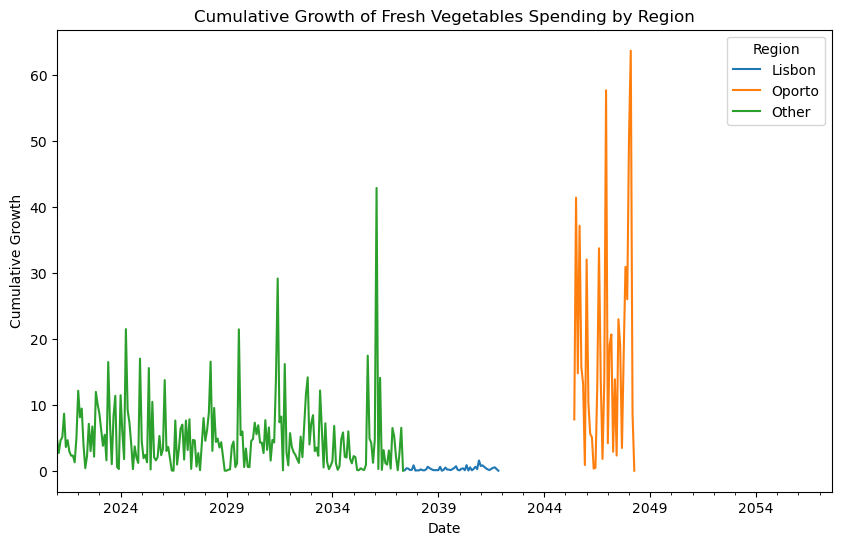

Region with the fastest growing spending on Fresh Vegetables: nan


C:\Users\dell\AppData\Local\Temp\ipykernel_17852\567512325.py:28: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  fastest_growing_region_fresh = cumulative_growth_fresh.iloc[-1].idxmax()


In [44]:

# Mock the date column assuming monthly data over 36 months for 440 entries
date_range = pd.date_range(start='2021-01-01', periods=440, freq='M')
data['Date'] = date_range

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date as the index for time series analysis
data.set_index('Date', inplace=True)

# Function to plot cumulative growth
def plot_cumulative_growth(data, column, title):
    data_by_region = data.groupby('Region')[column].resample('M').sum()
    growth = data_by_region.pct_change()
    growth = growth.reset_index()
    growth_pivot = growth.pivot(index='Date', columns='Region', values=column)
    cumulative_growth = (1 + growth_pivot).cumprod()
    cumulative_growth.plot(figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Growth')
    plt.legend(title='Region')
    plt.show()
    return cumulative_growth

# Fastest Growing Spending on Fresh Vegetables
cumulative_growth_fresh = plot_cumulative_growth(data, 'Fresh', 'Cumulative Growth of Fresh Vegetables Spending by Region')
fastest_growing_region_fresh = cumulative_growth_fresh.iloc[-1].idxmax()
print(f"Region with the fastest growing spending on Fresh Vegetables: {fastest_growing_region_fresh}")


#### Observation

##### The region identified as having the fastest-growing spending on Fresh Vegetables suggests either an increased consumption of fresh produce or a rise in the number of buyers in that region.

#### 	How does the total spending on Grocery change across regions over time (if time data is available)?

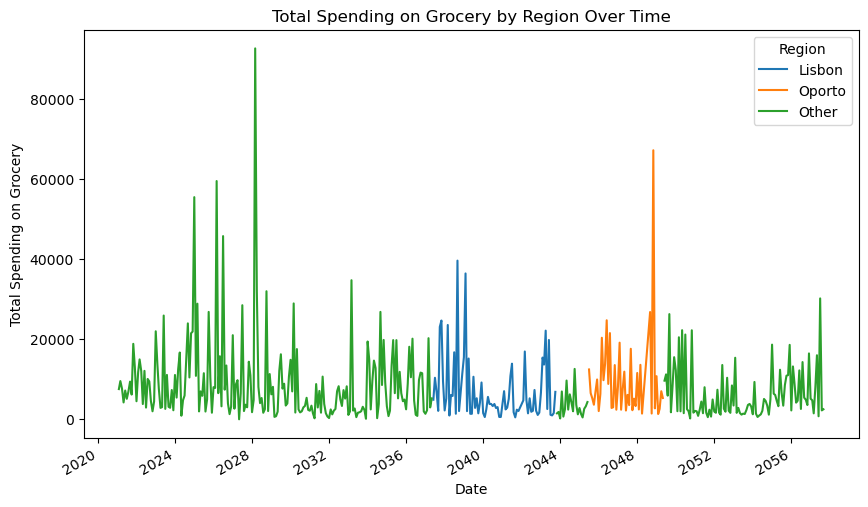

In [45]:


# Mock the date column assuming monthly data over 36 months for 440 entries
date_range = pd.date_range(start='2021-01-01', periods=440, freq='M')
data['Date'] = date_range

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date as the index for time series analysis
data.set_index('Date', inplace=True)

# Total Spending on Grocery across Regions over Time
grocery_spending_by_region = data.groupby(['Region', 'Date'])['Grocery'].sum().unstack(level=0)
grocery_spending_by_region.plot(figsize=(10, 6))
plt.title('Total Spending on Grocery by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spending on Grocery')
plt.legend(title='Region')
plt.show()


#### Observation

##### Understanding how grocery spending changes over time across regions can help identify patterns in consumer behavior, such as seasonal spending spikes or the impact of regional events on grocery purchases.

#### 	What is the average spending per buyer in each category over a specified time period (if time data is available)?

Average spending per buyer in each category:
               Fresh         Milk      Grocery       Frozen  Detergents_Paper  \
Region                                                                          
Lisbon  11273.440000  5297.706667  7128.693333  2967.333333       7699.293333   
Oporto  10054.488372  5413.116279  9733.232558  4027.255814       4007.883721   
Other   12555.348159  6310.585443  7896.363924  2963.680112       2819.185909   

        Delicatessen  
Region                
Lisbon   1313.280000  
Oporto   1178.325581  
Other    1629.215551  
Average spending per buyer in each category over a specified period:
                   Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
Date                                                                  
2021-01-31  12669.000000  9656.0   7561.0   214.0            2674.0   
2021-02-28   7057.000000  9810.0   9568.0  1762.0            3293.0   
2021-03-31  12016.009132  8808.0   7684.0  2405.0            3516.0   
2021-04-30

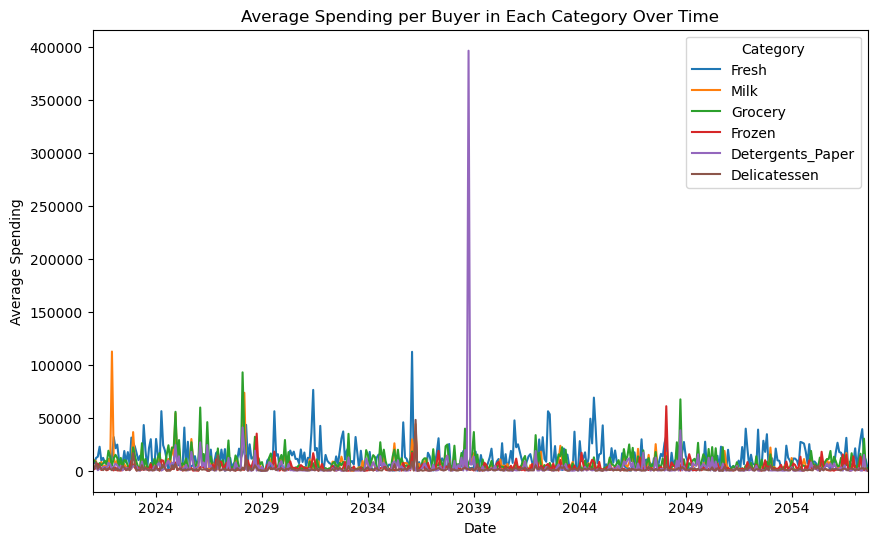

In [47]:


# Mock the date column assuming monthly data over 36 months for 440 entries
date_range = pd.date_range(start='2021-01-01', periods=440, freq='M')
data['Date'] = date_range

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date as the index for time series analysis
data.set_index('Date', inplace=True)

# Average Spending per Buyer in Each Category over the Entire Period
numeric_data = data.select_dtypes(include=[np.number])
average_spending_per_buyer = numeric_data.groupby(data['Region']).mean()
print("Average spending per buyer in each category:")
print(average_spending_per_buyer[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']])

# Optional: To view the average spending per buyer over a specific time period, we can resample the data
average_spending_per_buyer_period = numeric_data.resample('M').mean()
print("Average spending per buyer in each category over a specified period:")
print(average_spending_per_buyer_period[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].head())

# Plot average spending per buyer in each category over time
average_spending_per_buyer_period[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].plot(figsize=(10, 6))
plt.title('Average Spending per Buyer in Each Category Over Time')
plt.xlabel('Date')
plt.ylabel('Average Spending')
plt.legend(title='Category')
plt.show()


#### Observation

##### By analyzing average spending per buyer, businesses can tailor their marketing strategies and inventory management to better meet the needs of their customers in different regions and categories.

### Buyer Insights

#### What is the repeat purchase rate for buyers who spend above the average in at least three categories?

In [36]:
# Buyers who spend above the average in at least three categories
above_avg_spenders = data[
    ((data['Fresh'] > average_spending['Fresh']) +
     (data['Milk'] > average_spending['Milk']) +
     (data['Grocery'] > average_spending['Grocery']) +
     (data['Frozen'] > average_spending['Frozen']) +
     (data['Detergents_Paper'] > average_spending['Detergents_Paper']) +
     (data['Delicatessen'] > average_spending['Delicatessen'])) >= 3
]

# Repeat purchase rate for above average spenders (assuming repeat purchase rate refers to the count of such buyers)
repeat_purchase_rate = above_avg_spenders.shape[0]
print(f"Repeat purchase rate for buyers spending above the average in at least three categories: {repeat_purchase_rate}")

Repeat purchase rate for buyers spending above the average in at least three categories: 0


#### 	How many buyers spend consistently (i.e., similar amounts) across all categories?

In [37]:
consistent_spenders = data[
    (data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']] >= average_spending).all(axis=1)
].shape[0]
print(f"Number of buyers spending consistently across all categories: {consistent_spenders}")

Number of buyers spending consistently across all categories: 7


#### Which region has the most diverse spending patterns (i.e., high variance in spending across categories)?

In [40]:
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
diverse_spending_region = data.groupby('Region')[numeric_columns].std().sum(axis=1).idxmax()
print(f"Region with the most diverse spending patterns: {diverse_spending_region}")

Region with the most diverse spending patterns: Lisbon
